<a href="https://colab.research.google.com/github/Foultank10/Face-Mask-Detection-AI-Project/blob/master/facemask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Model using Own CNN Architecture

In [1]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 43.7MB/s 
     |████████████████████████████████| 3.9MB 30.8MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=c5b7a0129a1a4a795efdc75b20f0cdd8981a2a5e583e4a718ce158d3679c132c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [2]:
pip install keras==2.3.1

     |████████████████████████████████| 378kB 2.7MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [4]:
# for accuracy and loss graph
import matplotlib.pyplot as plt
 
import tensorflow
 
print(keras.__version__)
print(tensorflow.__version__)

2.3.1
2.1.0


In [5]:
train_data_path = "/content/drive/My Drive/Facemask/dataset/train"
validation_data_path ="/content/drive/My Drive/Facemask/dataset/valid"

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 

In [7]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [8]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
 
training_data.class_indices

Found 3649 images belonging to 2 classes.


{'with_mask': 0, 'without_mask': 1}

In [9]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')
 

Found 806 images belonging to 2 classes.


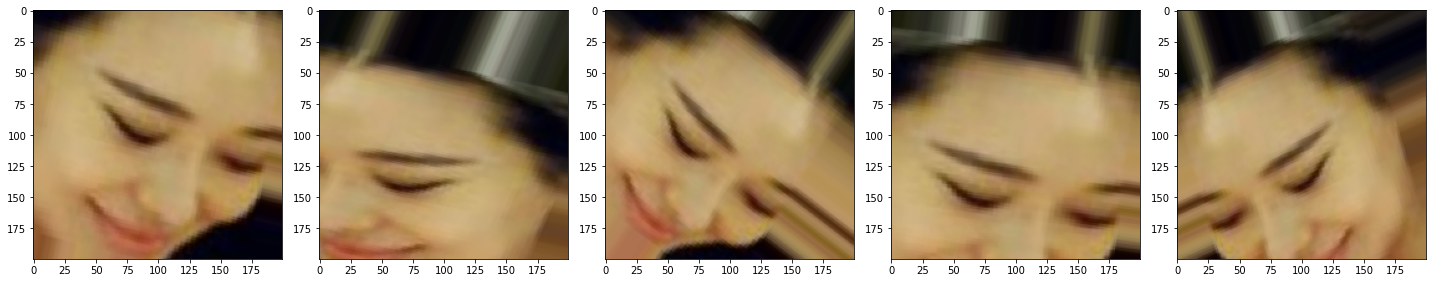

In [10]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [11]:
model_path = '/content/drive/My Drive/Facemask/model/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [12]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])
 

In [13]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/50
 1/29 [>.............................] - ETA: 4:07 - loss: 0.7000 - accuracy: 0.4766

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/29 [==>...........................] - ETA: 11:42 - loss: 0.6889 - accuracy: 0.5452

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/29 [===>..........................] - ETA: 14:18 - loss: 0.7111 - accuracy: 0.5189

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/29 [====>.........................] - ETA: 15:12 - loss: 0.7062 - accuracy: 0.5338

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/29 [=====>........................] - ETA: 15:23 - loss: 0.6984 - accuracy: 0.5489

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/29 [======>.......................] - ETA: 15:42 - loss: 0.6906 - accuracy: 0.5522

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/29 [=======>......................] - ETA: 15:23 - loss: 0.6846 - accuracy: 0.5546

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/29 [========>.....................] - ETA: 14:59 - loss: 0.6751 - accuracy: 0.5776

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/29 [=========>....................] - ETA: 14:33 - loss: 0.6656 - accuracy: 0.6039

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/29 [==========>...................] - ETA: 14:04 - loss: 0.6538 - accuracy: 0.6156

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/29 [===========>..................] - ETA: 13:27 - loss: 0.6427 - accuracy: 0.6280

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/29 [============>.................] - ETA: 12:44 - loss: 0.6366 - accuracy: 0.6352

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/29 [=============>................] - ETA: 11:59 - loss: 0.6240 - accuracy: 0.6478

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/29 [==============>...............] - ETA: 11:13 - loss: 0.6102 - accuracy: 0.6586

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/29 [===============>..............] - ETA: 10:31 - loss: 0.5948 - accuracy: 0.6695

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/29 [================>.............] - ETA: 9:43 - loss: 0.5837 - accuracy: 0.6796 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/29 [=================>............] - ETA: 8:57 - loss: 0.5755 - accuracy: 0.6859

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/29 [==================>...........] - ETA: 8:10 - loss: 0.5664 - accuracy: 0.6944

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/29 [===================>..........] - ETA: 7:23 - loss: 0.5569 - accuracy: 0.7024

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/29 [====================>.........] - ETA: 6:36 - loss: 0.5475 - accuracy: 0.7097

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/29 [=====================>........] - ETA: 5:47 - loss: 0.5489 - accuracy: 0.7127

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/29 [======================>.......] - ETA: 4:58 - loss: 0.5390 - accuracy: 0.7195

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/29 [=======================>......] - ETA: 4:09 - loss: 0.5292 - accuracy: 0.7268

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/29 [========================>.....] - ETA: 3:20 - loss: 0.5211 - accuracy: 0.7335

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/29 [=========================>....] - ETA: 2:30 - loss: 0.5136 - accuracy: 0.7391

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/29 [==========================>...] - ETA: 1:40 - loss: 0.5105 - accuracy: 0.7427

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/29 [===========================>..] - ETA: 50s - loss: 0.5060 - accuracy: 0.7475 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/29 [==============================] - 1484s 51s/step - loss: 0.5044 - accuracy: 0.7501 - val_loss: 0.2355 - val_accuracy: 0.9144

Epoch 00001: val_accuracy improved from -inf to 0.91439, saving model to /content/drive/My Drive/Facemask/model/model.h5
Epoch 2/50
29/29 [==============================] - 201s 7s/step - loss: 0.3226 - accuracy: 0.8775 - val_loss: 0.2813 - val_accuracy: 0.9218

Epoch 00002: val_accuracy improved from 0.91439 to 0.92184, saving model to /content/drive/My Drive/Facemask/model/model.h5
Epoch 3/50
29/29 [==============================] - 201s 7s/step - loss: 0.2887 - accuracy: 0.8937 - val_loss: 0.3618 - val_accuracy: 0.9342

Epoch 00003: val_accuracy improved from 0.92184 to 0.93424, saving model to /content/drive/My Drive/Facemask/model/model.h5
Epoch 4/50
29/29 [==============================] - 201s 7s/step - loss: 0.3146 - accuracy: 0.8879 - val_loss: 0.1594 - val_accuracy: 0.9467

Epoch 00004: val_accuracy improved from 0.93424 to 0.94665, saving model

In [15]:
 cnn_model.save('/content/drive/My Drive/Facemask/model/model.h5')

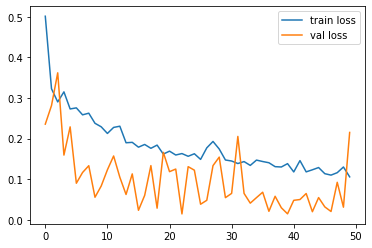

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history.history['loss'], label='train loss')
plt.plot(cnn_model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

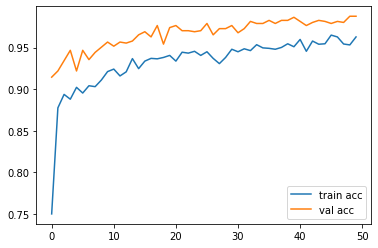

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the accuracy
plt.plot(cnn_model.history.history['accuracy'], label='train acc')
plt.plot(cnn_model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# import packages
import cv2
import os
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
 
#load model # Accuracy=97.4 , validation Accuracy = 99.1 # very light model, size =5MB
model = load_model('/content/drive/My Drive/Facemask/model/model.h5') # cnn
 
# model accept below hight and width of the image
img_width, img_hight = 200, 200
 
 
# Load the Cascade face Classifier
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
 
#parameters for text
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 
# org 
org = (1, 1)
class_lable=' '      
# fontScale 
fontScale = 1 #0.5
# Blue color in BGR 
color = (255, 0, 0) 
# Line thickness of 2 px 
thickness = 2 #1
 
#read image from webcam
color_img = cv2.imread('images/mask-5136259_1280.jpg')
     
# Convert to grayscale
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
     
# Detect the faces
faces = face_cascade.detectMultiScale(gray_img, 1.1, 6) 
     
#take face then predict class mask or not mask then draw recrangle and text then display image
img_count = 0
for (x, y, w, h) in faces:
    org = (x-10,y-10)
    img_count +=1 
    color_face = color_img[y:y+h,x:x+w] # color face
    cv2.imwrite('faces/input/%dface.jpg'%(img_count),color_face)
    img = load_img('faces/input/%dface.jpg'%(img_count), target_size=(img_width,img_hight))
         
    img = img_to_array(img)/255
    img = np.expand_dims(img,axis=0)
    pred_prob = model.predict(img)
    #print(pred_prob[0][0].round(2))
    pred=np.argmax(pred_prob)
             
    if pred==0:
        print("User with mask - predic = ",pred_prob[0][0])
        class_lable = "Mask"
        color = (255, 0, 0)
        cv2.imwrite('faces/with_mask/%dface.jpg'%(img_count),color_face)
        cv2.rectangle(color_img, (x, y), (x+w, y+h), (0, 0, 255), 3)
        # Using cv2.putText() method 
        cv2.putText(color_img, class_lable, org, font,  
                                   fontScale, color, thickness, cv2.LINE_AA) 
        cv2.imwrite('faces/with_mask/%dmask.jpg'%(img_count),color_img)
 
    else:
        print('user not wearing mask - prob = ',pred_prob[0][1])
        class_lable = "No Mask"
        color = (0, 255, 0)
        cv2.imwrite('faces/without_mask/%dface.jpg'%(img_count),color_face)
        cv2.rectangle(color_img, (x, y), (x+w, y+h), (0, 0, 255), 3)
        # Using cv2.putText() method 
        cv2.putText(color_img, class_lable, org, font,  
                                   fontScale, color, thickness, cv2.LINE_AA)         
        cv2.imwrite('faces/with_mask/%dno_mask.jpg'%(img_count),color_img)
                 
 
     
# display image
cv2.imshow('LIVE face mask detection', color_img)
     
cv2.waitKey() 
 
#close all windows
cv2.destroyAllWindows()

error: ignored

SyntaxError: ignored